# 2) Use decision trees to prepare a model on fraud data
## treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

### Data Description :
Undergrad : person is under graduated or not

Marital.Status : marital status of a person

Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government

Work Experience : Work experience of an individual person

Urban : Whether that person belongs to urban area or not

In [177]:
#import libabries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix


import warnings 
warnings.filterwarnings('ignore')

In [178]:
fraud_data=pd.read_csv('Fraud_check.csv')
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [179]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [180]:
fraud_data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [181]:
fraud_data.duplicated().sum()

np.int64(0)

In [182]:
fraud_data.describe(include='all')

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
count,600,600,600.000000,600.000000,600.000000,600
unique,2,3,NaN,NaN,NaN,2
top,YES,Single,NaN,NaN,NaN,YES
freq,312,217,NaN,NaN,NaN,302
mean,NaN,NaN,55208.375000,108747.368333,15.558333,NaN
std,NaN,NaN,26204.827597,49850.075134,8.842147,NaN
min,NaN,NaN,10003.000000,25779.000000,0.000000,NaN
25%,NaN,NaN,32871.500000,66966.750000,8.000000,NaN
50%,NaN,NaN,55074.500000,106493.500000,15.000000,NaN
75%,NaN,NaN,78611.750000,150114.250000,24.000000,NaN


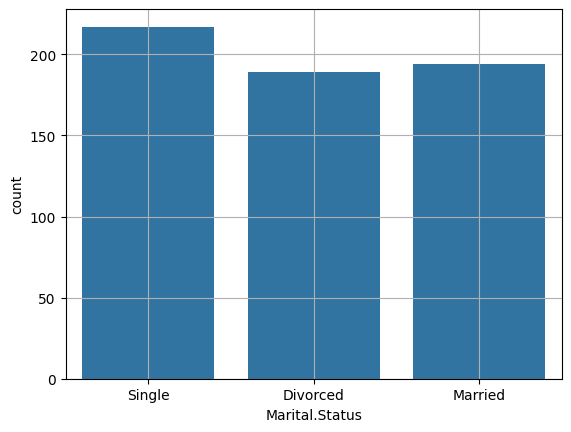

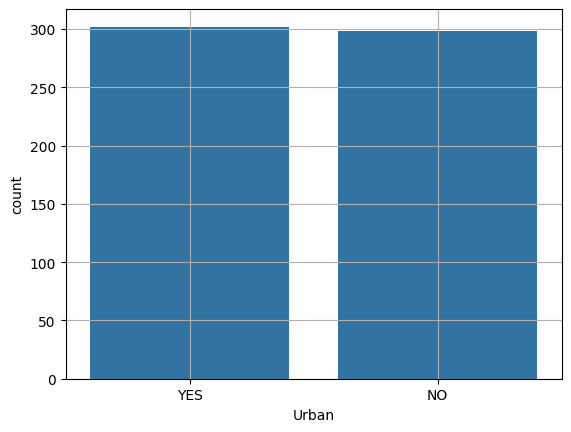

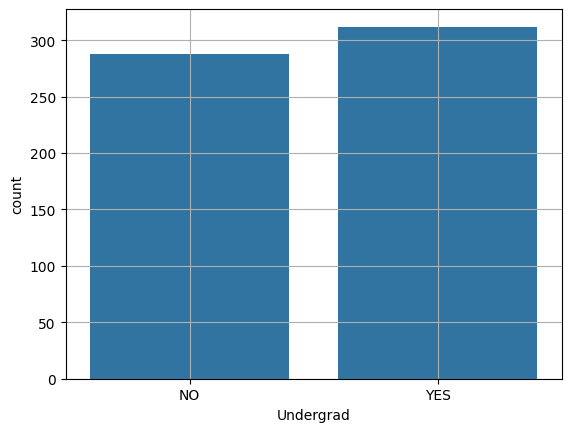

In [183]:
sns.countplot(x='Marital.Status',data=fraud_data)
plt.grid(True)
plt.show()

sns.countplot(x='Urban',data=fraud_data)
plt.grid(True)
plt.show()

sns.countplot(x='Undergrad',data=fraud_data)
plt.grid(True)
plt.show()

### Lets assume: taxable_income <= 30000 as “Risky=0” and others are “Good=1”

In [184]:
print('minimum_value : ' , fraud_data['Taxable.Income'].min() ,'\n maximun_value :',fraud_data['Taxable.Income'].max())

minimum_value :  10003 
 maximun_value : 99619


In [185]:
#Converting Target variable 'Sales' into categories Low, Medium and High.
fraud_data['Taxable.Income'] = pd.cut(x=fraud_data['Taxable.Income'],bins = [10002,30000,99620], labels=['Risky','Good'])
fraud_data['Taxable.Income']

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [186]:
fraud_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO


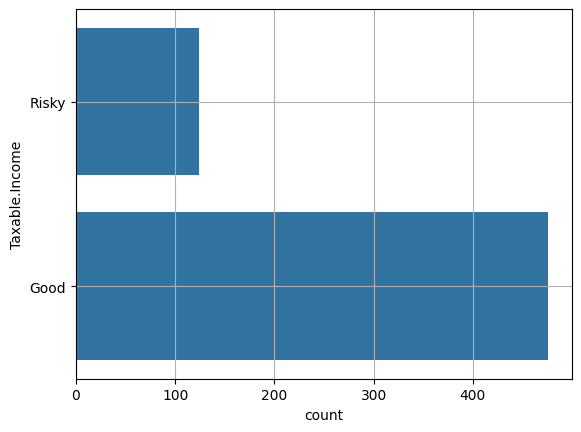

In [187]:
sns.countplot(fraud_data['Taxable.Income'])
plt.grid(True)
plt.show()

In [188]:
fraud_data['Taxable.Income'].value_counts()

Taxable.Income
Good     476
Risky    124
Name: count, dtype: int64

In [189]:
fraud_data = pd.get_dummies(fraud_data, columns=["Taxable.Income"], drop_first=True, dtype=int)


In [190]:
fraud_data.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income_Good
0,NO,Single,50047,10,YES,1
1,YES,Divorced,134075,18,YES,1
2,NO,Married,160205,30,YES,1
3,YES,Single,193264,15,YES,1
4,NO,Married,27533,28,NO,1


In [191]:
fraud_data['Taxable.Income_Good'].unique()

array([1, 0])

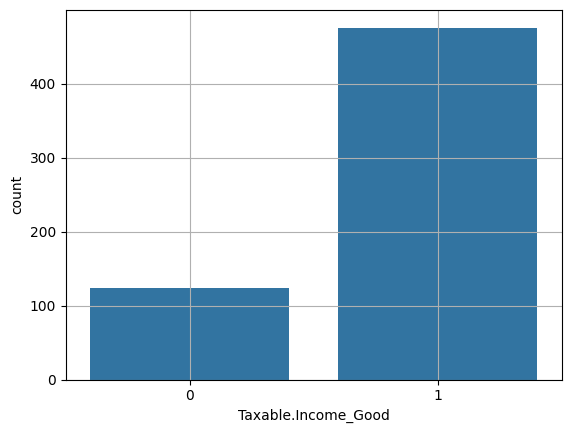

In [192]:
sns.countplot(x='Taxable.Income_Good', data=fraud_data)
plt.grid(True)
plt.show()


In [144]:
#encoding categorical fraud_data
label_encoder = preprocessing.LabelEncoder()

fraud_data['Undergrad'] = label_encoder.fit_transform(fraud_data['Undergrad'])
# fraud_data['Taxable.Income_Good'] = label_encoder.fit_transform(fraud_data['Taxable.Income_Good'])
fraud_data['Marital.Status'] = label_encoder.fit_transform(fraud_data['Marital.Status'])
fraud_data['Urban'] = label_encoder.fit_transform(fraud_data['Urban'])

fraud_data

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income_Good
0,0,2,50047,10,1,1
1,1,0,134075,18,1,1
2,0,1,160205,30,1,1
3,1,2,193264,15,1,1
4,0,1,27533,28,0,1
...,...,...,...,...,...,...
595,1,0,39492,7,1,1
596,1,0,55369,2,1,1
597,0,0,154058,0,1,1
598,1,1,180083,17,0,1


## Data Preperation

In [145]:
fraud_data.shape

(600, 6)

In [146]:
X=fraud_data.drop('Taxable.Income_Good',axis=1)
y=fraud_data[['Taxable.Income_Good']]

In [147]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33, random_state = 12)

## Building Decision Tree Classifier using Entropy Criteria

In [148]:
dt_model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dt_model.fit(X_train,y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


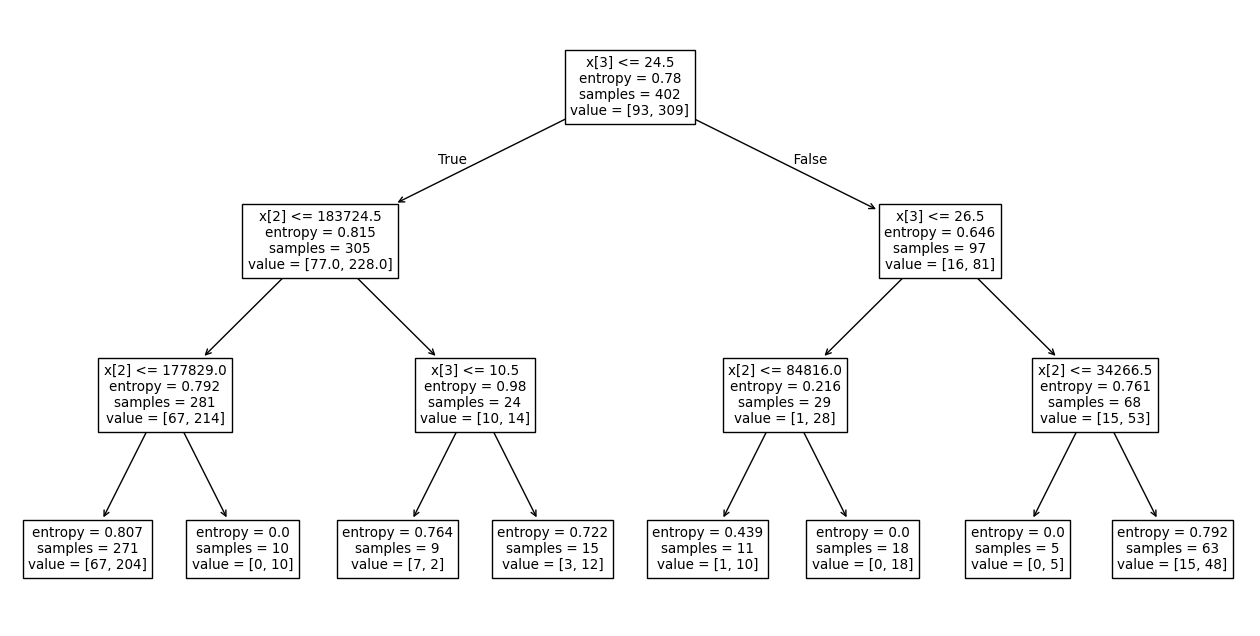

In [149]:
plt.figure(figsize=(16,8))
tree.plot_tree(dt_model)
plt.show()

In [150]:
#preciction on test data
y_pred_test = dt_model.predict(X_test)
y_pred_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [151]:
#accuracy score
print("accuracy is:", accuracy_score(y_test,y_pred_test))

accuracy is: 0.8181818181818182


In [152]:
confusion_matrix(y_test,y_pred_test)

array([[  0,  31],
       [  5, 162]])

## Building Decision Tree Classifier using Gini Criteria

In [153]:
dt_model_gini = DecisionTreeClassifier(criterion = 'gini',max_depth=3)
dt_model_gini.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


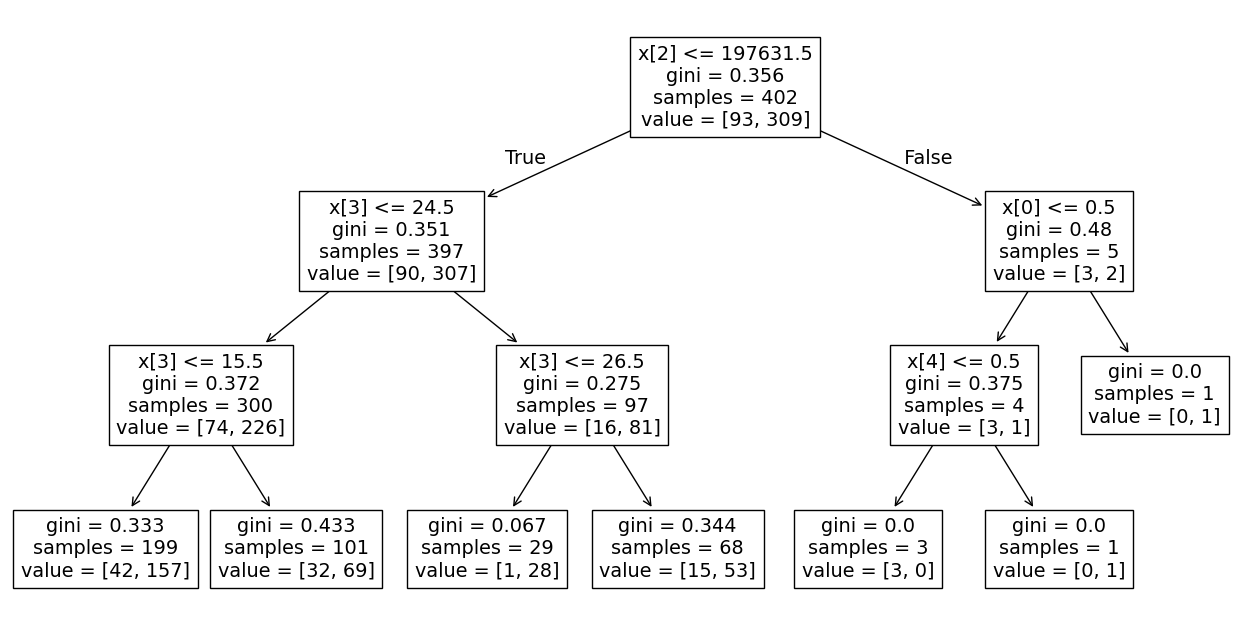

In [154]:
plt.figure(figsize=(16,8))
tree.plot_tree(dt_model_gini)
plt.show()

In [155]:
y_pred_test_g = dt_model_gini.predict(X_test)
y_pred_test_g

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [156]:
print("accuracy is:", accuracy_score(y_test,y_pred_test_g))

accuracy is: 0.8434343434343434


In [157]:
#confusion matrix
confusion_matrix(y_test,y_pred_test_g)

array([[  0,  31],
       [  0, 167]])

## Conclusion:
#### when we use 'entropy' criterion and max_depth=3 we get 81% accuracy of the model.
#### while when we use 'gini' criterion and max_depth=3 we get 84% accuracy of the model.